In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import scipy

# Orange Trees: Non-linear growth curve

In [4]:
data = {'x' : [118, 484, 664, 1004, 1231, 1372, 1582], #Instants de mesure
        'Y' : [[30, 33, 30, 32, 30], [58, 69, 51, 62, 49], [87, 111, #Circomférences mesurées à chacun des 7 instant
            75, 112, 81], [115, 156, 108, 167, 125], [120, 172, 115, 179, 142], 
            [142, 203, 139, 209, 174], [145, 203, 140, 214, 177]],
        'Y_T' : [[30, 58, 87, 115, 120, 142, 145], [33, 69, 111, 156, 172, 203, 203], #On transpose Y pour afficher les mesures par arbre
            [30, 51, 75, 108, 115, 139, 140], [32, 62, 112, 167, 179, 209, 214],
            [30, 49, 81, 125, 142, 174, 177]]
        }                   

Tree_amount = 5
Time_stamps = 7
data

{'x': [118, 484, 664, 1004, 1231, 1372, 1582],
 'Y': [[30, 33, 30, 32, 30],
  [58, 69, 51, 62, 49],
  [87, 111, 75, 112, 81],
  [115, 156, 108, 167, 125],
  [120, 172, 115, 179, 142],
  [142, 203, 139, 209, 174],
  [145, 203, 140, 214, 177]],
 'Y_T': [[30, 58, 87, 115, 120, 142, 145],
  [33, 69, 111, 156, 172, 203, 203],
  [30, 51, 75, 108, 115, 139, 140],
  [32, 62, 112, 167, 179, 209, 214],
  [30, 49, 81, 125, 142, 174, 177]]}

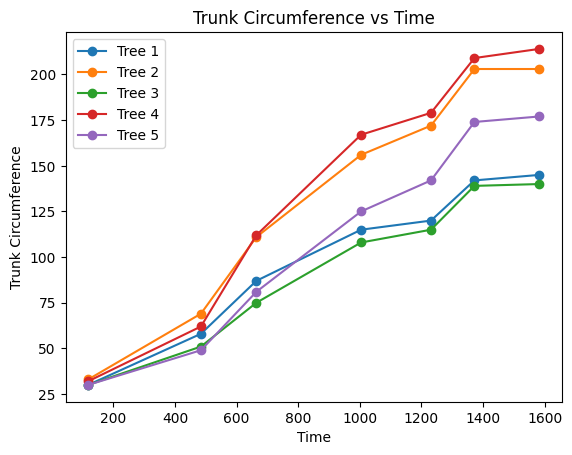

In [3]:
#Affichons les données
for i in range(Tree_amount):
    plt.plot(data['x'], data['Y_T'][i], '-o', label='Tree '+str(i+1))
plt.legend()
plt.xlabel('Time')
plt.ylabel('Trunk Circumference')
plt.title('Trunk Circumference vs Time')
plt.show()

In [17]:
priors_theta_1 = np.zeros((5,2))
priors_theta_1[0]

array([0., 0.])

In [ ]:
def MH(nchain, data, priors_tau_c, priors_theta_1, priors_theta_2, priors_theta_3, init_chain_theta, init_chain_tau, prop_sd):
    # priors_theta_1 = np.zeros((5,2))
    # priors_tau_c = np.zeros((2,1)
    chain_theta_1 = np.zeros((5,nchain))
    chain_theta_2 = np.zeros((5,nchain)) 
    chain_theta_3 = np.zeros((5,nchain))
    chain_tau = np.zeros((1,nchain)) 
    
    #Initialization of the Monte Carlo Chain

    chain_theta_1[0] = init_chain_theta[0]
    chain_theta_2[0] = init_chain_theta[1] 
    chain_theta_3[0] = init_chain_theta[2]
    chain_tau[0] = init_chain_tau

    x = data['x']
    Tree_amount = len(data['Y_T'])
    Time_stamps = len(data['Y_T'][0]) 

    
    for t in range(nchain+1) :
        current_theta_1 = chain_theta_1[t]
        current_theta_2 = chain_theta_2[t]
        current_theta_3 = chain_theta_3[t]
        current_tau_c = chain_tau[t]

        def update_eta(current_theta_1, current_theta_2, current_theta_3, x):
            x = np.array(x)
            phi_1 = np.exp(current_theta_1)[:, np.newaxis] 
            phi_2 = (np.exp(current_theta_2) - 1)[:, np.newaxis] 
            phi_3 = (-np.exp(current_theta_3))[:, np.newaxis] 
            x = x[np.newaxis, :] 
            eta_values = phi_1 / (1 + phi_2 * np.exp(phi_3 * x)) 

            return eta_values
        
        def target_distribution(x, i) :
            eta = update_eta(current_theta_1, current_theta_2, current_theta_3)
            likelihood = np.exp(-np.sum((data['Y_T']-eta))/2*current_tau_c)
            prior = np.exp(-(x-priors_theta_1[i][0])/(2*priors_theta_1[i][1]))
            return likelihood*prior
        
        eta = update_eta(current_theta_1, current_theta_2, current_theta_3, x)
        
        # Udapte theta_1 (dimensions 1 à 5)
        for i in range(Tree_amount) :
            candidat = np.random.normal(loc = current_theta_1[i], scale = prop_sd)
            alpha = target_distribution(candidat, i)/target_distribution(current_theta_1[i])
            u = np.random.uniform()
            if u < alpha : 
                current_theta_1[i] = candidat

        # Udapte theta_2 (dimensions 6 à 10)

        # Udapte theta_3 (dimensions 11 à 15)


        # Udapte of tau (dimension 16)
        alpha = priors_tau_c[0] + Time_stamps*Tree_amount/2
        beta = priors_tau_c[1] + 0.5*np.sum(data-eta)
        current_tau_c = stats.gamma(alpha,beta)

    print('test')

In [ ]:
#Données d'initialisation (seront utiles pour l'éxécution de l'algorithme)
#theta <- structure(c(5, 5, 5, 5, 5,
#                2, 2, 2, 2, 2,
#		-6, -6, -6, -6, -6), 
#      .Dim = c(5, 3))
#mu <- c(5, 2, -6)
#tau <- c(20, 20, 20)
#tau_C <- 20